In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

1.13.1


In [4]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.02):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [5]:
callbacks = myCallback()

In [6]:
mnist = tf.keras.datasets.mnist

In [7]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [8]:
import matplotlib.pyplot as plt

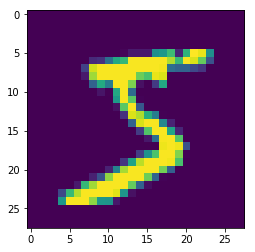

In [29]:
plt.imshow(x_train[0])

In [10]:
print(y_test[0])

7


In [11]:
print(x_test[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

In [12]:
x_train = x_train / 255.0

In [13]:
x_test = x_test / 255.0

In [14]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [15]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
model.fit(x_train, y_train, epochs=10, callbacks = [callbacks])

Epoch 1/10
60000/60000 [==============================] - 9s 143us/sample - loss: 0.2018 - acc: 0.9408
Epoch 2/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0812 - acc: 0.9752
Epoch 3/10
60000/60000 [==============================] - 13s 215us/sample - loss: 0.0530 - acc: 0.9837
Epoch 4/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0360 - acc: 0.9889
Epoch 5/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.0251 - acc: 0.9916
Epoch 6/10
60000/60000 [==============================] - 9s 158us/sample - loss: 0.0223 - acc: 0.9927
Epoch 7/10
59648/60000 [============================>.] - ETA: 0s - loss: 0.0171 - acc: 0.9945
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 9s 156us/sample - loss: 0.0172 - acc: 0.9944


In [17]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 26us/sample - loss: 0.0729 - acc: 0.9797


[0.07289357044454227, 0.9797]

In [18]:
classification = model.predict(x_test)

In [19]:
print(classification[0])

[3.7743728e-10 6.5292105e-10 7.9587147e-07 8.8909974e-06 9.0256813e-17
 4.6196776e-11 5.4012766e-16 9.9999034e-01 7.3143678e-09 6.2091625e-09]


In [22]:
print(y_test[0])

7
